<h1> Проверка гипотез по увеличению выручки в интернет-магазине —
оценить результаты A/B теста </h1>

## Введение.   
Отдел аналитики совместно с отделом маркетинга подготовили список гипотез для увеличения выручки интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


### Цель проекта. 
Предложение рекомендаций по увеличению выручки интернет-магазина на основании результатов A/B-теста.

### Описание данных. 

Датасет hypothesis.csv :  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Датасет orders.csv :   
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

Датасет visitors.csv :  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  


### План работы.  

1.Изучение общей информации о предлагаемых гипотезах.

2.Приоритизация гипотез.  
2.1.Приоретизация гипотез на основе фреймворка ICE.    
2.2.Приоретизация гипотез на основе фреймворка RICE.  
2.3.Выводы о приоритете гипотез.

3.Анализ A/B-теста  
3.1.Изучение общей информации о данных, полученных в результате A/B-теста.  
3.2.Кумулятивная выручка по группам. Выводы и предположения.  
3.3.Кумулятивный средний чек по группам. Выводы и предположения.  
3.4.Относительное изменение кумулятивного среднего чека группы B к группе A. Выводы и предположения.  
3.5.Кумулятивная конверсия по группам. Выводы и предположения.  
3.6.Относительное изменение кумулятивной конверсии группы B к группе A. Выводы и предположения.  
3.7.Количество заказов по пользователям. Выводы и предположения.  
3.8.Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.  
3.9.Стоимость заказов. Выводы и предположения.  
3.10.Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границу для определения аномальных заказов.  
3.11.Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.  
3.12.Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.  
3.13.Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения. 
3.14.Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.  
3.15.Решение по результатам теста и его обоснование. 

### Гипотезы об увеличении выручки интернет-магазина.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats 
from matplotlib import  pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from IPython.display import display_html 

In [2]:
hypothesis = pd.read_csv('/home/daniil/Documents/datasets/ab_test_for_online_store_ds/hypothesis.csv')
pd.set_option("display.max_colwidth", None)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Приоритизация гипотез.

### Приоретизация гипотез на основе фреймворка ICE.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Приоретизация гипотез на основе фреймворка RICE.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Выводы о приоритете гипотез.    
Использование фреймворков ICE и RICE приводит к разным результатам приоретизации гипотез, что обусловлено расчетом показателей с или без учета охвата населения.  Таким образом с учетом лишь влияния на пользователя, уровня уверенности и затрат - на первое место выходит гипотеза, предлагающая проверить эффективность предоставления скидки в день рождения. Есть основания считать, что подобная практика окажет выраженное влияние на пользователей с большой долей вероятности, в то время как трудозатраты оценены в 5 баллов, что является приблизительно средним показателем. Однако, в случае использования RICE-фреймворка, т.е. дополнительного учета оценки охвата пользователей, наибольший приоритет получает гипотеза об эффективности создания формы подписки и базы клиентов для email-рассылок, в то время как введение скидок на день рождения отпускается на 5 место. Другие изменения в приоретизации менее выражены, таким образом топ-3 гипотезами рекомендованными для проверки являются :  
1-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;  
2-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;  
3-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  

## Анализ A/B-теста

### Изучение общей информации о данных, полученных в результате A/B-теста.

In [5]:
orders = pd.read_csv('/home/daniil/Documents/datasets/ab_test_for_online_store_ds/orders.csv') 
visitors = pd.read_csv('/home/daniil/Documents/datasets/ab_test_for_online_store_ds/visitors.csv')

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# функции для получения информации о датасетах
def orders_info(df_x):
    display(df_x.head(3))
    display(df_x.info())
    display(f'orders - абсолютные дубликаты : {df_x.duplicated().sum()}')
    display(f'Транзакции - дубликаты : {df_x["transactionId"].duplicated().sum()}')
    display(f'Количество пользователей : {df_x["visitorId"].nunique()}')
    display(f'Первый заказ : {df_x["date"].min()}, последний заказ : {df_x["date"].max()}')
    a_group = orders[orders['group']=='A']    
    b_group = orders[orders['group']=='B']    
    same_users = a_group.merge(b_group, on='visitorId', how='inner')
    display(f'Количество пользователей группы А :{len(a_group)}',
            f'Количество пользователей группы B :{len(b_group)}',
            f'Количество пользователей участвующих в обеих группах : {same_users["visitorId"].nunique()}')
    
    
def visitors_info(df_x):
    display(df_x.head(3))
    display(df_x.info())
    display(f'visitors - абсолютные дубликаты : {df_x.duplicated().sum()}')
    display(f'Начало эксперимента : {df_x["date"].min()}, конец эксперимента : {df_x["date"].max()}')
    
display(orders_info(orders))
display(visitors_info(visitors))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

'orders - абсолютные дубликаты : 0'

'Транзакции - дубликаты : 0'

'Количество пользователей : 1031'

'Первый заказ : 2019-08-01 00:00:00, последний заказ : 2019-08-31 00:00:00'

'Количество пользователей группы А :557'

'Количество пользователей группы B :640'

'Количество пользователей участвующих в обеих группах : 58'

None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

'visitors - абсолютные дубликаты : 0'

'Начало эксперимента : 2019-08-01 00:00:00, конец эксперимента : 2019-08-31 00:00:00'

None

***Вывод***  
По результатам проведения А/В теста получены данные, предоставленые 2 датасетами. Датасет "orders" содержит информацию о 1197 заказе, которые были совершены 1031 пользователем за период с 2019-08-01 по 2019-08-31, указана выручка от заказа, а также принадлежность пользователя к группе тестирования.  
При тестировании в группу А вошло 557 пользователей, в группу В 640. Установлено, что 58 пользователей участвовали в двух группах одновременно. Влияние данных неуникальных пользователей будет произведено на показатели выручки, среднего чека, конверсии, количества и стоимостей заказов.  
Датасет "visitors" содержит информацию о ежедневной посещаемости сайта пользователями каждой группы тестирования  за период  с 2019-08-01 по 2019-08-31.

### Кумулятивная выручка по группам.

In [6]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

display(ordersAggregated.head(3))

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401


In [7]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам новые названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(visitorsAggregated.head(3))
display(cumulativeData.head(3))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338


,index,values
0,date,2019-08-31 00:00:00
1,revenue,4084803
2,orders,557
,index,values
0,date,2019-08-31 00:00:00
1,revenue,5907760
2,orders,640


'Разница в общей выручке между группами А и В к окончанию теста : -1822957'

'Разница в общем кол-ве заказов между группами А и В к окончанию теста : -83'

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61


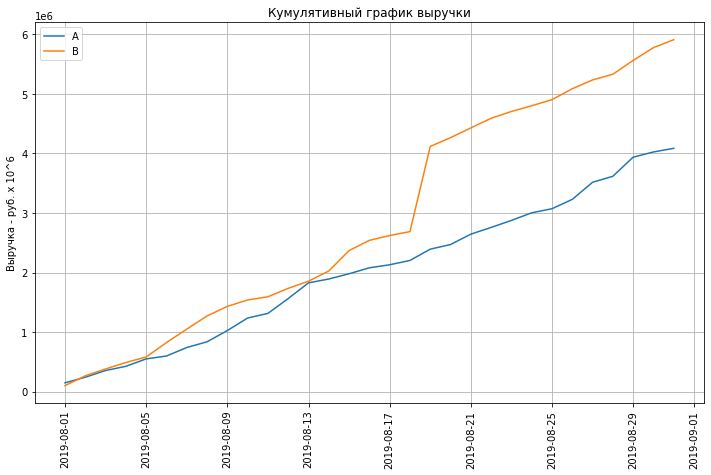

In [8]:
# датасеты с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# вывод таблиц для наглядности
cumulativeRevenueA_max = cumulativeRevenueA.max().to_frame(name='values').reset_index() 
cumulativeRevenueB_max = cumulativeRevenueB.max().to_frame(name='values').reset_index()

cumulativeRevenueA_max_styler = cumulativeRevenueA_max.style.set_table_attributes("style='display:inline'").set_caption('Группа А')
cumulativeRevenueB_max_styler = cumulativeRevenueB_max.style.set_table_attributes("style='display:inline'").set_caption('Группа В')

space = "\xa0" * 10
display_html(cumulativeRevenueA_max_styler._repr_html_()+space+cumulativeRevenueB_max_styler._repr_html_(), raw=True)

dif_reven = cumulativeRevenueA.max()[1]-cumulativeRevenueB.max()[1]
display(f'Разница в общей выручке между группами А и В к окончанию теста : {dif_reven}')
dif_order = cumulativeRevenueA.max()[2]-cumulativeRevenueB.max()[2]
display(f'Разница в общем кол-ве заказов между группами А и В к окончанию теста : {dif_order}')

display(cumulativeRevenueB.head(3))
# Строим графики выручки групп
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend() 
plt.title('Кумулятивный график выручки')
plt.ylabel("Выручка - руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

***Вывод***  
Объем выручки растет в обоих группах на протяжении всего теста. 18-19.08.19 в группе В наблюдается резки рост в сравнени с группой А, однако уже 20.08.22 рост выручки вернулся к прежней динамике. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. К окончанию теста общая выручка в группе В составила 5907760 руб., что на 1822957 руб. больше чем в группе А. Группа В так же лидировала по количеству заказов, их количество было равно 640, что на 83 больше чем в группе А. 

#### Оценка влияния неуникальных пользователей на кумулятивную выручку по группам

In [9]:
# фильтрация датасета orders на данные пользователей, участвующих в двух группах
a_group = orders[orders['group']=='A']    
b_group = orders[orders['group']=='B']    
same_orders = a_group.merge(b_group, on='visitorId', how='inner')
same_orders_set = same_orders["visitorId"].unique().tolist()
display(f'Список из Id {len(same_orders_set)} неуникальных пользователей: {same_orders_set[:3]} ...')

# фильтрация датасета visitors на данные пользователей, участвующих в двух группах
same_a_visit = same_orders[['date_x', 'group_x', 'visitorId']].drop_duplicates().rename(columns={'date_x':'date','group_x':'group','visitorId':'visitorId'})
same_b_visit = same_orders[['date_y', 'group_y', 'visitorId']].drop_duplicates().rename(columns={'date_y':'date','group_y':'group','visitorId':'visitorId'})
same_visit = pd.concat([same_a_visit,same_b_visit],axis=0)
same_group_visit = same_visit.groupby(['date','group'],as_index=False)['visitorId'].count().sort_values(['date','group'])

filter_visitors = visitors.merge(same_group_visit, on=['date','group'], how='outer').fillna(0)
filter_visitors['visitors'] = (filter_visitors['visitors'] - filter_visitors['visitorId']).astype(int)
filter_visitors = filter_visitors.drop('visitorId', axis=1)

display('Датасет visitors отфильтрованный по неуникальным пользователям',filter_visitors.head(3))

'Список из Id 58 неуникальных пользователей: [4069496402, 199603092, 3803269165] ...'

'Датасет visitors отфильтрованный по неуникальным пользователям'

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507


In [10]:
filtered_orders = orders.query('visitorId not in @same_orders_set')

# создаем массив уникальных пар значений дат и групп теста (без неуникальных пользователей)
datesGroups_filtered = filtered_orders[['date', 'group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах (без неуникальных пользователей)
ordersAggregated_filtered = datesGroups_filtered.apply(
    lambda x: filtered_orders[
        np.logical_and(
            filtered_orders['date'] <= x['date'], filtered_orders['group'] == x['group'] 
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [11]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина  (без неуникальных пользователей)
visitorsAggregated_filtered = datesGroups_filtered.apply(
    lambda x: filter_visitors[
        np.logical_and(
            filter_visitors['date'] <= x['date'], filter_visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам новые названия (без неуникальных пользователей)
cumulativeData_filtered = ordersAggregated_filtered.merge(
    visitorsAggregated_filtered, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData_filtered.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [12]:
# датасет с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А (без неуникальных пользователей)
cumulativeRevenueA_filtered = cumulativeData_filtered[cumulativeData_filtered['group']=='A'][['date','revenue', 'orders']]

# датасет с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B (без неуникальных пользователей)
cumulativeRevenueB_filtered = cumulativeData_filtered[cumulativeData_filtered['group']=='B'][['date','revenue', 'orders']]

# Вывод таблиц для наглядности
cumulativeRevenueA_filtered_max = cumulativeRevenueA_filtered.max().to_frame(name='values').reset_index()
cumulativeRevenueB_filtered_max = cumulativeRevenueB_filtered.max().to_frame(name='values').reset_index()

cumulativeRevenueA_filtered_max_styler = cumulativeRevenueA_filtered_max.style.set_table_attributes("style='display:inline'").set_caption('Группа А (без неуникальных пользователей)')
cumulativeRevenueB_filtered_max_styler = cumulativeRevenueB_filtered_max.style.set_table_attributes("style='display:inline'").set_caption('Группа В (без неуникальных пользователей)')

space = "\xa0" * 10
display_html(cumulativeRevenueA_max_styler._repr_html_()+space+cumulativeRevenueA_filtered_max_styler._repr_html_(), raw=True)
display_html(cumulativeRevenueB_max_styler._repr_html_()+space+cumulativeRevenueB_filtered_max_styler._repr_html_(), raw=True)

dif_reven_filtered = cumulativeRevenueA_filtered.max()[1]-cumulativeRevenueB_filtered.max()[1]
display(f'Разница в общей выручке между группами А и В к окончанию теста (без неуникальных пользователей): {dif_reven_filtered}')
dif_order_filtered = cumulativeRevenueA_filtered.max()[2]-cumulativeRevenueB_filtered.max()[2]
display(f'Разница в общем кол-ве заказов между группами А и В к окончанию теста (без неуникальных пользователей): {dif_order_filtered}')
        

display(f'Влияние неуникальных пользователей на разницу выручки в группах: {round((1-(dif_reven_filtered/dif_reven))*100,1)} %')
display(f'Влияние неуникальных пользователей на разницу количества заказов в группах: {round((1-(dif_order_filtered/dif_order))*100,1)} %')

,index,values
0,date,2019-08-31 00:00:00
1,revenue,4084803
2,orders,557
,index,values
0,date,2019-08-31 00:00:00
1,revenue,3364656
2,orders,468


,index,values
0,date,2019-08-31 00:00:00
1,revenue,5907760
2,orders,640
,index,values
0,date,2019-08-31 00:00:00
1,revenue,5068972
2,orders,548


'Разница в общей выручке между группами А и В к окончанию теста (без неуникальных пользователей): -1704316'

'Разница в общем кол-ве заказов между группами А и В к окончанию теста (без неуникальных пользователей): -80'

'Влияние неуникальных пользователей на разницу выручки в группах: 6.5 %'

'Влияние неуникальных пользователей на разницу количества заказов в группах: 3.6 %'

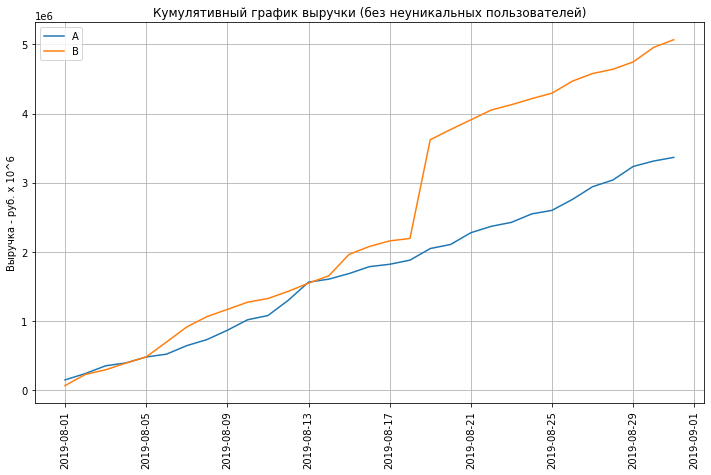

In [13]:
# Строим графики выручки групп (без неуникальных пользователей)
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA_filtered['date'], cumulativeRevenueA_filtered['revenue'], label='A')
plt.plot(cumulativeRevenueB_filtered['date'], cumulativeRevenueB_filtered['revenue'], label='B')
plt.grid()
plt.legend() 
plt.title('Кумулятивный график выручки (без неуникальных пользователей)')
plt.ylabel("Выручка - руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

***Вывод***   

Удаление неуникальных пользователей сократило разницу в общей выручке между группами на 6.5%, а количество заказов на 3.6%, однако не повлияло на тенденции графика кумулятивной выручки. Учитывая вышеизложенное, данной погрешностью допустимо пренебречь и сохранить данные всех пользователей для дальнейшего анализа. 

### Кумулятивный средний чек по группам. Выводы и предположения.  

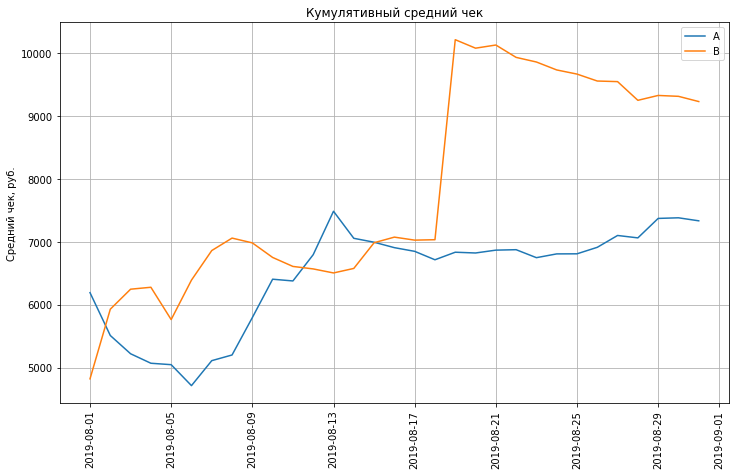

In [14]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend() 
plt.title('Кумулятивный средний чек')
plt.ylabel("Средний чек, руб.")
plt.xticks(rotation=90)
plt.show()

***Вывод***  
Средний чек группы B к 13.08.19 достигает 7000 руб. и поддерживается на близком к этому уровню до конца теста. Средний чек группы А с 08.08.19 по 18.08.19 так же был близок к 7000 р., однако 18-19.09.19 отмечается резкое увеличение показателя почти в 1,5 раза, после чего наблюдается тенденция к снижению данного показателя и для получения данных, отражающих реальную ситуацию требуется либо больше данных либо удалить выбросы. Такое изменение кумулятивного среднего чека свидетельствует о вероятном наличии выбросов в данных в виде наличия заказов высокой стоимости.

#### Оценка влияния неуникальных пользователей на средний чек

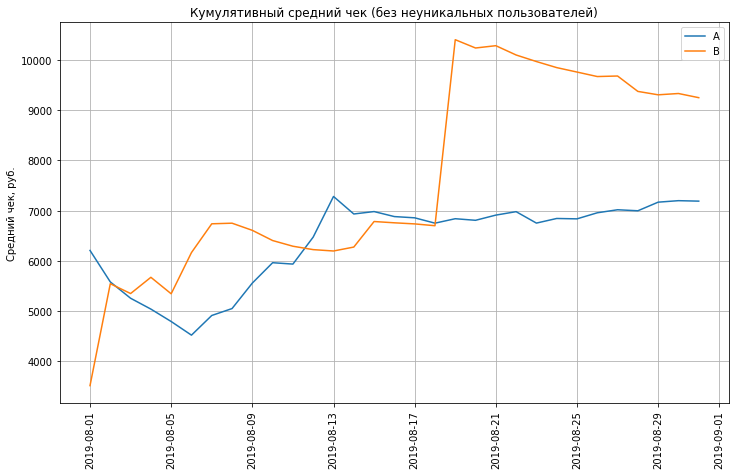

In [15]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA_filtered['date'], cumulativeRevenueA_filtered['revenue']/cumulativeRevenueA_filtered['orders'], label='A')
plt.plot(cumulativeRevenueB_filtered['date'], cumulativeRevenueB_filtered['revenue']/cumulativeRevenueB_filtered['orders'], label='B')
plt.grid()
plt.legend() 
plt.title('Кумулятивный средний чек (без неуникальных пользователей)')
plt.ylabel("Средний чек, руб.")
plt.xticks(rotation=90)
plt.show()

***Вывод***  

Согласно графику 'Кумулятивный средний чек (без неуникальных пользователей)' изменений тенденций по наблюдаемому показателю не наблюдается, что делает допустимым сохранить данные всех пользователей для дальнейшего анализа. 

### Относительное изменение кумулятивного среднего чека группы B к группе A. Выводы и предположения.  

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61


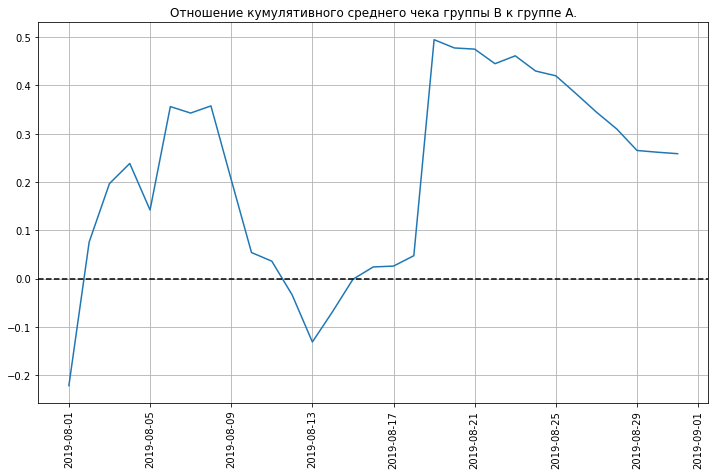

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

display(mergedCumulativeRevenue.head(3))

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('Отношение кумулятивного среднего чека группы B к группе A.')
plt.xticks(rotation=90)
plt.show()

***Вывод***  
При анализе графика отношения среднего кумулятивного чека группы В к группе А можно выделить два периода выраженных отличий: с 05 по 09.08.19 и с 19.08.19 до конца теста. Выбросы в результатах теста, вероятно, находятся именно в этих интервалах.

### Кумулятивная конверсия по группам. Выводы и предположения.  

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885


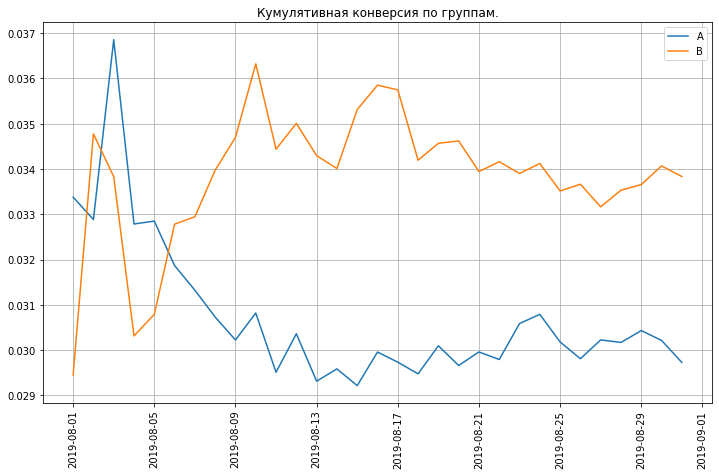

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

display(cumulativeData.head(3))

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам.')
plt.grid()
plt.legend() 
plt.xticks(rotation=90)
plt.show()
 


***Вывод***  
Согласно графику кумулятивной конверсии после первой недели теста группа В превосходит группу А. Таким образом данный показатель для группы В варьирует на уровне 3,4%, в то время как для группы А на уровне 3,0%.

#### Оценка влияния неуникальных пользователей на конверсию

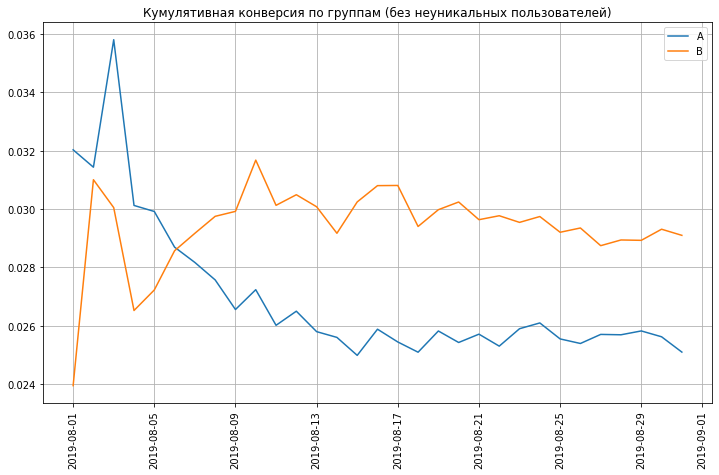

In [18]:
# считаем кумулятивную конверсию (без неуникальных пользователей)'
cumulativeData_filtered['conversion'] = cumulativeData_filtered['orders']/cumulativeData_filtered['visitors']

# отделяем данные по группе A
cumulativeData_filtered_A = cumulativeData_filtered[cumulativeData_filtered['group']=='A']

# отделяем данные по группе B
cumulativeData_filtered_B = cumulativeData_filtered[cumulativeData_filtered['group']=='B']

# строим графики (без неуникальных пользователей)'
plt.figure(figsize=(12,7))
plt.plot(cumulativeData_filtered_A['date'], cumulativeData_filtered_A['conversion'], label='A')
plt.plot(cumulativeData_filtered_B['date'], cumulativeData_filtered_B['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам (без неуникальных пользователей)')
plt.grid()
plt.legend() 
plt.xticks(rotation=90)
plt.show()

***Вывод***  

После удаления неуникальных пользователей конверсия снизилась в обеих группах, однако это не повлияло на тенденции графика 'Кумулятивная конверсия по группам', таким образом к окончанию теста конверсия в группе А варьировала на уровне 2.5 % (ранее 3.0%), а конверсия группы В на уровне 2,9 % (ранее 3.4%). Учитывая приведенные данные допустимо сохранить данные всех пользователей для дальнейшего анализа.

### Относительное изменение кумулятивной конверсии группы B к группе A. Выводы и предположения.  

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833


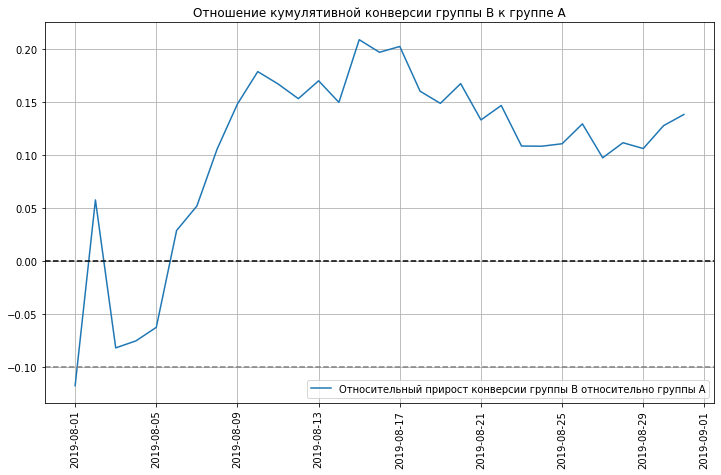

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

display(mergedCumulativeConversions.head(3))

plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Отношение кумулятивной конверсии группы B к группе A')
plt.grid()
plt.xticks(rotation=90)
plt.show()

***Вывод***  
Согласно графику "Отношение кумулятивной конверсии группы B к группе A" к окончанию теста конверсия в группе В превышает конверсию в группе А на 10-15%.

### Количество заказов по пользователям. Выводы и предположения.  

,visitors,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9


'Наименьшее количество заказов : 1. Наибольшее количество заказов 11'

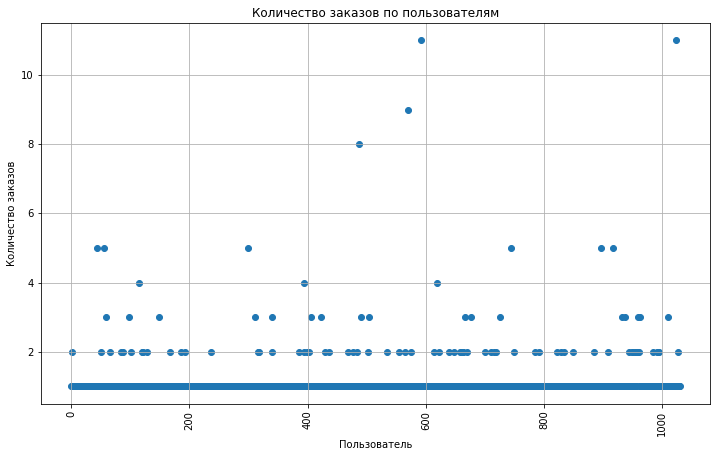

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitors', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(3)) 
display(f'Наименьшее количество заказов : {ordersByUsers["orders"].min()}. Наибольшее количество заказов {ordersByUsers["orders"].max()}')

quant_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,7))
plt.scatter(quant_values, ordersByUsers['orders']) 
plt.grid()
plt.title('Количество заказов по пользователям')
plt.ylabel("Количество заказов")
plt.xlabel('Пользователь')
plt.xticks(rotation=90)
plt.show()

***Вывод***  
Согласно графику "Количество заказов по пользователям" большинство пользователей совершают до 2 заказов. На вопрос считать ли данные о пользователях совершивших больше 2 заказов аномалиями можно ответить определив выборочные процентили количества заказов на одного пользователя.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.  

In [21]:
percentile_orders = np.percentile(ordersByUsers['orders'], [90, 95, 99])
display(percentile_orders) 

array([1., 2., 4.])

***Вывод***  
Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальне даные по ней. 

#### Оценка влияния неуникальных пользователей на количество заказов и выбор границы для определения аномальных пользователей

,visitors,orders
908,3967698036,3
55,249864742,3
478,2108163459,3


'Наименьшее количество заказов : 1. Наибольшее количество заказов 3'

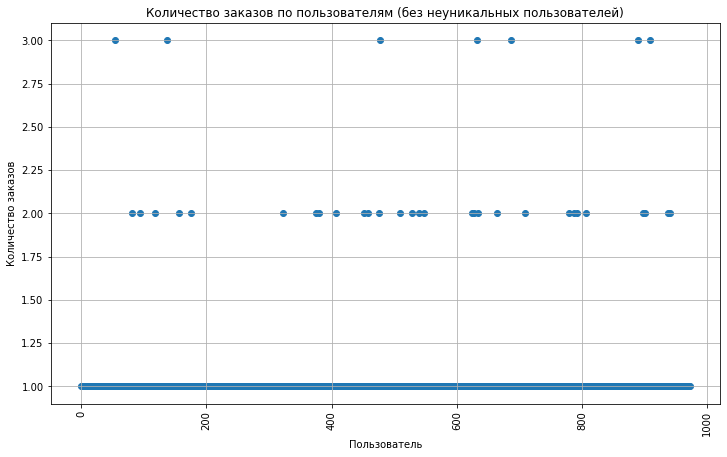

array([1., 1., 2.])

In [22]:
ordersByUsers_filtered = (
    filtered_orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers_filtered.columns = ['visitors', 'orders']

display(ordersByUsers_filtered.sort_values(by='orders', ascending=False).head(3)) 
display(f'Наименьшее количество заказов : {ordersByUsers_filtered["orders"].min()}. Наибольшее количество заказов {ordersByUsers_filtered["orders"].max()}')

quant_values_filtered = pd.Series(range(0,len(ordersByUsers_filtered)))

plt.figure(figsize=(12,7))
plt.scatter(quant_values_filtered, ordersByUsers_filtered['orders']) 
plt.grid()
plt.title('Количество заказов по пользователям (без неуникальных пользователей)')
plt.ylabel("Количество заказов")
plt.xlabel('Пользователь')
plt.xticks(rotation=90)
plt.show()

percentile_orders_filtered = np.percentile(ordersByUsers_filtered['orders'], [90, 95, 99])
display(percentile_orders_filtered) 

***Вывод***  
После удаления неуникальных пользователей наибольшее количество заказов снизилось с 11 до 3, что в свою очередь повлияло на распределение процинтелей, таким образом теперь не более 5% пользователей совершали 1 заказ. Влияние снижения данного показателя на общие выводы будут дополнительно проверены.

### Стоимость заказов. Выводы и предположения.  


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


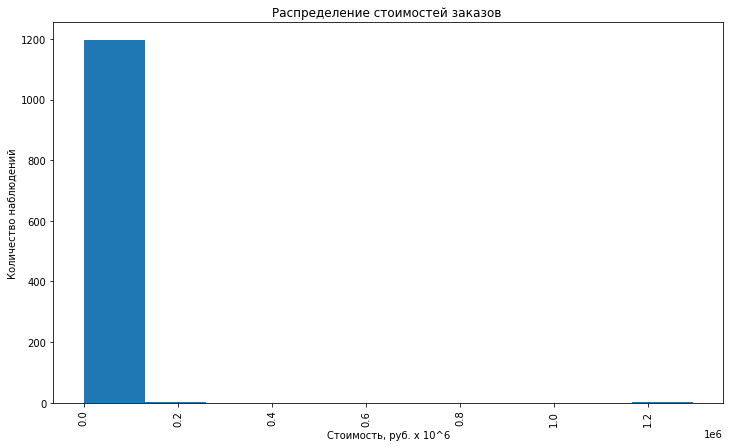

In [23]:
display(orders.head(3))

plt.figure(figsize=(12,7))
plt.hist(orders['revenue']) 
plt.title('Распределение стоимостей заказов ')
plt.ylabel("Количество наблюдений")
plt.xlabel('Стоимость, руб. х 10^6')
plt.xticks(rotation=90)
plt.show()

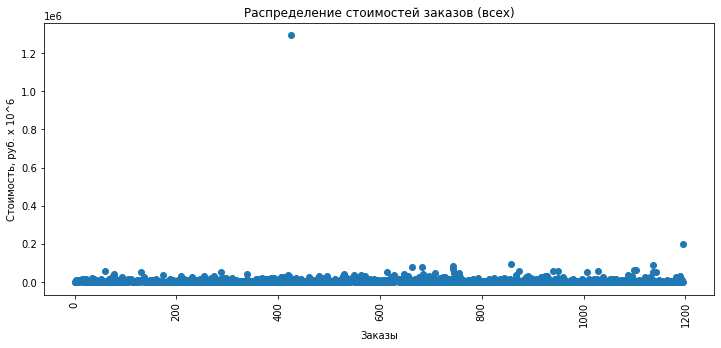

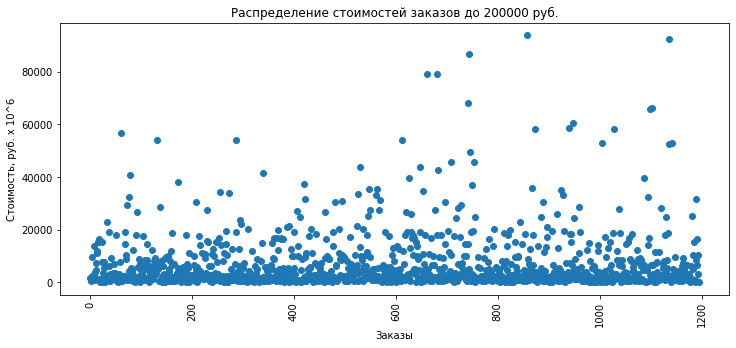

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
x_trunc = pd.Series(range(0,len(orders.query('revenue <200000')['revenue'])))

plt.figure(figsize=(12,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимостей заказов (всех)')
plt.xlabel('Заказы')
plt.ylabel("Стоимость, руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(x_trunc, orders.query('revenue <200000')['revenue']) 
plt.title('Распределение стоимостей заказов до 200000 руб.')
plt.xlabel('Заказы')
plt.ylabel("Стоимость, руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

***Вывод***  
Согласно графикам "Распределение стоимости заказов" возможно определить 2 значительно отличающихся от общей выборки заказа, стоимостью около 200000 руб и 12 млн.руб. Однако для того чтобы определить действительно ли только 2 заказа отличаются от общей выборки следует определить выборочные процентили стоимости заказов.

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.  


In [25]:
percentile_revenue = np.percentile(orders['revenue'], [90, 95, 99])
display(percentile_revenue)

array([18168. , 28000. , 58233.2])

***Вывод***  
Не более 5% заказов превышают 28000 руб. 1% заказов превышают 58233,2 руб. Разумно выбрать 28000 руб. как верхнюю границу стоимости, и отсеять аномальные данные по ней.

#### Оценка влияния неуникальных пользователей на стоимость заказов и выбор границы для определения аномальных пользователей

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B


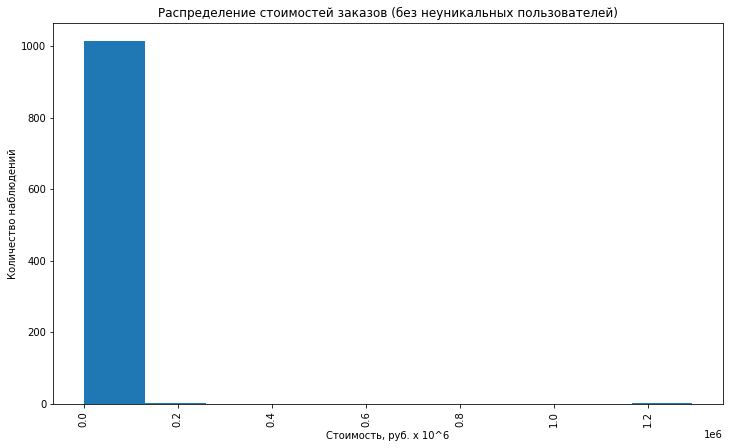

In [26]:
display(filtered_orders.head(3))

plt.figure(figsize=(12,7))
plt.hist(filtered_orders['revenue']) 
plt.title('Распределение стоимостей заказов (без неуникальных пользователей)')
plt.ylabel("Количество наблюдений")
plt.xlabel('Стоимость, руб. х 10^6')
plt.xticks(rotation=90)
plt.show()

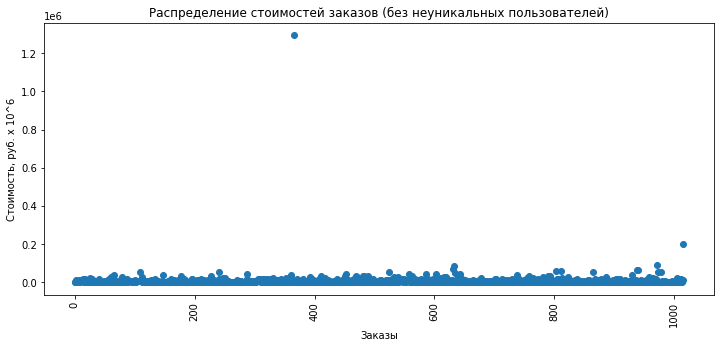

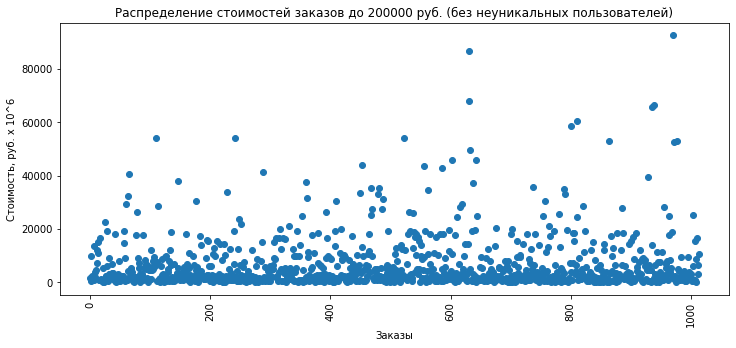

array([17990., 26785., 53904.])

'Влияние неуникальных пользователей на стоимость заказов в группах : 4.3%'

In [27]:
x_values_filtered = pd.Series(range(0,len(filtered_orders['revenue'])))
x_trunc_filtered = pd.Series(range(0,len(filtered_orders.query('revenue <200000')['revenue'])))

plt.figure(figsize=(12,5))
plt.scatter(x_values_filtered, filtered_orders['revenue']) 
plt.title('Распределение стоимостей заказов (без неуникальных пользователей)')
plt.xlabel('Заказы')
plt.ylabel("Стоимость, руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(x_trunc_filtered, filtered_orders.query('revenue <200000')['revenue']) 
plt.title('Распределение стоимостей заказов до 200000 руб. (без неуникальных пользователей)')
plt.xlabel('Заказы')
plt.ylabel("Стоимость, руб. х 10^6")
plt.xticks(rotation=90)
plt.show()

percentile_revenue_filtered = np.percentile(filtered_orders['revenue'], [90, 95, 99])
display(percentile_revenue_filtered)

display(f'Влияние неуникальных пользователей на стоимость заказов в группах : {round((1-(percentile_revenue_filtered[1] / percentile_revenue[1]))*100,1)}%')

***Вывод***  
После удаления неуникальных пользователей 95й процентиль снизился на 4.3%. Влияние снижения данного показателя на общие выводы будут дополнительно проверены.

### Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.  


In [28]:
# Таблицы с данными о пользователях участвовавших в тесте
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

display(visitorsADaily.head(2), visitorsBDaily.head(2))

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581


In [29]:
# Количество заказов для каждого уникального пользователя в группе А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']
display(ordersByUsersA.head(2))

# Количество заказов для каждого уникального пользователя в группе В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']
display(ordersByUsersB.head(2))

,userId,orders
0,8300375,1
1,11685486,1


,userId,orders
0,5114589,1
1,6958315,1


In [30]:
#Таблицы с количеством покупок для каждого пользователя (если пользователь ничего не купил то значение покупок равно 0)
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [31]:
# Проверка на нормальность распределения сырых данных в группах АВ теста :

alpha = 0.05  # критический уровень статистической значимости

def shapiro_result (s): # функция для вывода заключения о результатах теста на нормальность распределения
    result = stats.shapiro(sampleA)[1]
    if result < alpha:
        display(f'p-значение: {result} - отвергаем нулевую гипотезу: распределение не нормально')
    else:
        display(f'p-значение: {result} - не удалось отвергнуть нулевую гипотезу: распределение нормально') 

display('Проверка на нормальность распределения сырых данных группы А :', shapiro_result(sampleA))

display('Проверка на нормальность распределения сырых данных группы B :', shapiro_result(sampleB))

/home/daniil/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'p-значение: 0.0 - отвергаем нулевую гипотезу: распределение не нормально'

'Проверка на нормальность распределения сырых данных группы А :'

None

'p-значение: 0.0 - отвергаем нулевую гипотезу: распределение не нормально'

'Проверка на нормальность распределения сырых данных группы B :'

None

Необходимо проверить - различается ли конверсия в группах по сырым данным.  
Нулевая гипотеза (𝐻0) : различий в конверсии между группами нет.  
Альтернативная гипотеза (𝐻1) : различия в конверсии между группами есть.   
Уровень статистической значимости 𝛼: 5 %  
Критерий для проверки нулевой гипотезы : согласно результатам теста Шапиро-Уилка данные в обеих группах распределены не нормально, в данном случае для проверки гипотезы целесообразно применить критерий Манна-Уитни.  

In [32]:
# Расчёт статистической значимости различий в конверсии между группами
convers_raw = stats.mannwhitneyu(sampleA, sampleB)[1]

# Расчёт значения прироста конверсии в группе В по отношению к группе А
dif_convers_raw = sampleB.mean()/sampleA.mean()-1

alpha = 0.05

if convers_raw < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(convers_raw,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(convers_raw,3)}') 
    
display(f'Относительное различие в конверсии группы В к группе А : {round(dif_convers_raw*100, 1)} %')

'Отвергаем нулевую гипотезу, p-value : 0.017'

'Относительное различие в конверсии группы В к группе А : 13.8 %'

***Вывод***  
P-value значительно менее 0.05. Значит нельзя исключить наличие разницы в конверсии между группами, не смотря на то, что конверсия в группе В больше чем в группе А всего на 13,8 %.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.  


Необходимо проверить - различается ли средний чек в группах по сырым данным.   
Нулевая гипотеза (𝐻0) : различий в среднем чеке между группами нет.   
Альтернативная гипотеза (𝐻1) : различия в среднем чеке между группами есть.    
Уровень статистической значимости 𝛼: 5 %  
Критерий для проверки нулевой гипотезы : согласно результатам теста Шапиро-Уилка данные в обеих группах распределены не нормально, в данном случае для проверки гипотезы целесообразно применить критерий Манна-Уитни. 

In [33]:
av_chek_raw = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
dif_av_chek_raw = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

alpha = 0.05

if av_chek_raw < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(av_chek_raw,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(av_chek_raw,3)}') 
    
display(f'Относительное различие в среднем чеке группы В к группе А : {round(dif_av_chek_raw*100, 1)} %')

'Не удалось отвергнуть нулевую гипотезу, p-value : 0.729'

'Относительное различие в среднем чеке группы В к группе А : 25.9 %'

***Вывод***  
Средний чек группы B выше среднего чека группы A почти на 25,9%, однако данный результат не является статистически значимым (p-value : 0.729) и вероятно, получен случайно.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения. 


In [34]:
# определение пользователей с аномально высоким кол-м заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_orders[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_orders[1]]['userId'],
    ],
    axis=0,
)

# определение пользователей с аномально высокой стоимостью заказов

usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue[1]]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(3))
display(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
dtype: int64

74

In [35]:
# очищенные данные для групп А и В
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')], axis=0)

In [36]:
display('Проверка на нормальность распределения очищенных данных группы А :', shapiro_result(sampleAFiltered))

display('Проверка на нормальность распределения очищенных данных группы B :', shapiro_result(sampleBFiltered))

'p-значение: 0.0 - отвергаем нулевую гипотезу: распределение не нормально'

'Проверка на нормальность распределения очищенных данных группы А :'

None

'p-значение: 0.0 - отвергаем нулевую гипотезу: распределение не нормально'

'Проверка на нормальность распределения очищенных данных группы B :'

None

Необходимо проверить - различается ли конверсия в группах по очищенным данным.  
Нулевая гипотеза (𝐻0) : различий в конверсии между группами нет.  
Альтернативная гипотеза (𝐻1) : различия в конверсии между группами есть.    
Уровень статистической значимости 𝛼: 5 %  
Критерий для проверки нулевой гипотезы : согласно результатам теста Шапиро-Уилка данные в обеих группах распределены не нормально, в данном случае для проверки гипотезы целесообразно применить критерий Манна-Уитни. 

In [37]:
# Расчёт значения статистической значимости конверсии между группами
convers_filter = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
# Расчёт значения прироста конверсии в группе В по отношению к группе А
dif_convers_filter = sampleBFiltered.mean()/sampleAFiltered.mean()-1

if convers_filter < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(convers_filter,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(convers_filter,3)}') 
    
display(f'Относительное различие в конверсии группы В к группе А : {round(dif_convers_filter*100, 1)} %')

'Отвергаем нулевую гипотезу, p-value : 0.013'

'Относительное различие в конверсии группы В к группе А : 17.3 %'

***Вывод***  
На основании точек отсечения аномальных данных в количестве 2 заказов и стоимости в 28000 руб., установлено, что данные 74 пользователей можно считать значительно отклоняющимися от выборки или выбросами. По очищенной от выбросов выборки, установлена статистически значимая разница в уровне конверсии между группами, а относительное различие в конверсии группы В к группе А выросло с 13.8% до 17,3%.

#### Оценка влияния неуникальных пользователей на статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [38]:
# Таблицы с данными о пользователях участвовавших в тесте
visitorsADaily_filtered = filter_visitors[filter_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily_filtered.columns = ['date', 'visitorsPerDateA']

visitorsBDaily_filtered = filter_visitors[filter_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily_filtered.columns = ['date', 'visitorsPerDateB']

display(visitorsADaily.head(2), visitorsBDaily.head(2))

# Количество заказов для каждого уникального пользователя в группе А
ordersByUsersA_filtered = filtered_orders[filtered_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA_filtered.columns = ['userId', 'orders']
display(ordersByUsersA_filtered.head(2))

# Количество заказов для каждого уникального пользователя в группе В
ordersByUsersB_filtered = filtered_orders[filtered_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB_filtered.columns = ['userId', 'orders']
display(ordersByUsersB_filtered.head(2))

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581


,userId,orders
0,11685486,1
1,54447517,1


,userId,orders
0,5114589,1
1,6958315,1


In [39]:
# определение пользователей с аномально высоким кол-м заказов
usersWithManyOrders_filtered = pd.concat(
    [
        ordersByUsersA_filtered[ordersByUsersA_filtered['orders'] > percentile_orders_filtered[1]]['userId'],
        ordersByUsersB_filtered[ordersByUsersB_filtered['orders'] > percentile_orders_filtered[1]]['userId'],
    ],
    axis=0,
)

# определение пользователей с аномально высокой стоимостью заказов
usersWithExpensiveOrders_filtered = filtered_orders[filtered_orders['revenue'] > percentile_revenue_filtered[1]]['visitorId']

abnormalUsers_filtered = (
    pd.concat([usersWithManyOrders_filtered, usersWithExpensiveOrders_filtered], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers_filtered.head(3))
display(abnormalUsers_filtered.shape[0])

568     113298937
1099    148427295
928     204675465
dtype: int64

86

In [40]:
# очищенные данные для групп А и В
sampleAFiltered_nonuniq = pd.concat([ordersByUsersA_filtered[np.logical_not(ordersByUsersA_filtered['userId'].isin(abnormalUsers_filtered))]['orders'], pd.Series(0, index=np.arange(visitorsADaily_filtered['visitorsPerDateA'].sum() - len(ordersByUsersA_filtered['orders'])),name='orders')], axis=0)
sampleBFiltered_nonuniq = pd.concat([ordersByUsersB_filtered[np.logical_not(ordersByUsersB_filtered['userId'].isin(abnormalUsers_filtered))]['orders'], pd.Series(0, index=np.arange(visitorsBDaily_filtered['visitorsPerDateB'].sum() - len(ordersByUsersB_filtered['orders'])),name='orders')], axis=0)

In [41]:
# Расчёт значения статистической значимости конверсии между группами
convers_filter_nonuniq = stats.mannwhitneyu(sampleAFiltered_nonuniq, sampleBFiltered_nonuniq)[1]
# Расчёт значения прироста конверсии в группе В по отношению к группе А
dif_convers_filter_nonuniq = sampleBFiltered_nonuniq.mean()/sampleAFiltered_nonuniq.mean()-1

if convers_filter_nonuniq < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(convers_filter_nonuniq,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(convers_filter_nonuniq,3)}') 
    
display(f'Относительное различие в конверсии группы В к группе А : {round(dif_convers_filter_nonuniq*100, 1)} %')

'Отвергаем нулевую гипотезу, p-value : 0.016'

'Относительное различие в конверсии группы В к группе А : 17.4 %'

***Вывод***  
Неуникальные пользователи не оказывают влияния на статистическую значимость различий в конверсии между группами. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.  


Необходимо проверить - различается ли средний чек в группах по очищенным данным.   
Нулевая гипотеза (𝐻0) : различий в среднем чеке между группами нет.   
Альтернативная гипотеза (𝐻1) : различия в среднем чеке между группами есть.    
Уровень статистической значимости 𝛼: 5 %  
Критерий для проверки нулевой гипотезы : согласно результатам теста Шапиро-Уилка данные в обеих группах распределены не нормально, в данном случае для проверки гипотезы целесообразно применить критерий Манна-Уитни. 

In [42]:
# Расчёт статистической значимости различий в конверсии между группами по отфильтрованным данным

av_chek_filter = stats.mannwhitneyu(
    orders[
        np.logical_and(orders['group'] == 'A',np.logical_not(
        orders['visitorId'].isin(abnormalUsers)),)]['revenue']
    ,orders[
        np.logical_and(orders['group'] == 'B',np.logical_not(
        orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]

dif_chek_filter = orders[
    np.logical_and(
        orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/orders[
    np.logical_and(
        orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1

alpha = 0.05

if av_chek_filter < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(av_chek_filter,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(av_chek_filter,3)}') 
    
display(f'Относительное различие в среднем чеке группы В к группе А : {round(dif_chek_filter*100, 1)} %')

'Не удалось отвергнуть нулевую гипотезу, p-value : 0.738'

'Относительное различие в среднем чеке группы В к группе А : -2.0 %'

***Вывод***   
При анализе очищенных данных не удалось выявить статистически значимой разницы в среднем чеке (p-value : 0.738), что соответствует результатам, полученным до удаления выбросов. Однако относительная разница между группами изменилась существенно, таким образом если ранее в группе В средний чек был выше чем в группе А на 25%, то теперь этот показатель для группы В даже ниже группы на 2%.  

#### Оценка влияния неуникальных пользователей на статистическую значимость различий в среднем чеке между группами по «очищенным» данным. 

In [43]:
# Расчёт статистической значимости различий в конверсии между группами по отфильтрованным данным

av_chek_filter_non_uniq = stats.mannwhitneyu(
    filtered_orders[
        np.logical_and(filtered_orders['group'] == 'A',np.logical_not(
        filtered_orders['visitorId'].isin(abnormalUsers_filtered)),)]['revenue']
    ,filtered_orders[
        np.logical_and(filtered_orders['group'] == 'B',np.logical_not(
        filtered_orders['visitorId'].isin(abnormalUsers_filtered)),)]['revenue'],)[1]

dif_chek_filter_non_uniq = filtered_orders[
    np.logical_and(
        filtered_orders['group'] == 'B',np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers_filtered)),)]['revenue'].mean()/filtered_orders[
    np.logical_and(
        filtered_orders['group'] == 'A',np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers_filtered)),)]['revenue'].mean()- 1

alpha = 0.05

if av_chek_filter_non_uniq < alpha:
    display(f'Отвергаем нулевую гипотезу, p-value : {round(av_chek_filter_non_uniq,3)}')
else:
    display(f'Не удалось отвергнуть нулевую гипотезу, p-value : {round(av_chek_filter_non_uniq,3)}') 
    
display(f'Относительное различие в среднем чеке группы В к группе А : {round(dif_chek_filter_non_uniq*100, 1)} %')

'Не удалось отвергнуть нулевую гипотезу, p-value : 0.727'

'Относительное различие в среднем чеке группы В к группе А : -3.4 %'

***Вывод***  
Неуникальные пользователи не оказывают влияния на статистическую значимость различий в среднем чеке между группами. 

### Решение по результатам теста и его обоснование. 

В соответствии с полученными результатами установлены следующие факты:  
-Группа В по «сырым» данным превзошла группу А по абсолютному показателю выручки - на 1822957 руб, и количеству заказов - на 83 ед.  
-Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, таким образом группа B не хуже группы А.  
-Наблюдается статистически значимое различие по конверсии между группами как по «сырым» данным, так и по данным после фильтрации аномалий;  
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Результаты, полученные в группе В превосходят показатели группы А, тенденций для изменения лидирующей позиции группы не наблюдается. 
-При обработке результатов теста установлено, что 58 пользователей являлись участниками обеих групп тестирования. Данная особенность не повлияла на результаты АВ-теста. 
  
На основании выше изложенных фактов, есть основания для остановки теста и фиксации преимущества группы В. 
